In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 
import re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

import tensorflow as tf
import numpy as np

Using TensorFlow backend.


In [3]:
# loading the data
df = pd.read_csv("old/Reviews/Reviews1.csv")
print("Shape of the data "+str(df.shape))
print("Number of datapoints "+str(df.shape[0]))
print("Number of features "+str(df.shape[1]))

Shape of the data (568454, 10)
Number of datapoints 568454
Number of features 10


In [4]:
#How data looks like with the sample points
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
#Feature names
df.columns.values

array(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype=object)

In [6]:
# By this we can say that given dataset is imbalanced or balanced
df.Score.value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

In [7]:
#Removing the reviews whose score should be 3
df = df[df['Score']!=3]
# Splitting the review based on the space and finding the length for each review in the data
df['len_words'] = df.Text.apply(lambda x: len(x.split()))
# Keeping the reviews, only the words in the review lessthan or equal to the 100 
df = df[df['len_words'] <= 100]

In [8]:
# Storing the text column and corresponding label
data = df[['Text', 'Score']]
data.head()

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


In [9]:
# We are making the ratings above 3 making as 1 and below 3 as 0
data['sentiment']=[1 if (x>3) else 0 for x in data['Score']]
# converting the each review into lower_case letters
data['Text']= [x.lower() for x in data['Text']]

data['Text'] = data['Text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
data.head()

,Text,Score,sentiment
0,i have bought several of the vitality canned d...,5,1
1,product arrived labeled as jumbo salted peanut...,1,0
2,this is a confection that has been around a fe...,4,1
3,if you are looking for the secret ingredient i...,2,0
4,great taffy at a great price there was a wide...,5,1


In [10]:
#Shape of the data
data.shape

(403797, 3)

In [11]:
tokenizer = Tokenizer(nb_words=10000, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                                   lower=True,split=' ')
tokenizer.fit_on_texts(data['Text'].values)
X = tokenizer.texts_to_sequences(data['Text'].values)
X = pad_sequences(X)
Y = pd.get_dummies(data['sentiment']).values

In [12]:
# Text data for one sample before list of tokens
print(data['Text'].loc[0])
print("*"*25, "Corresponding List of tokens for this review","*"*25)
# Corresponding review after padding with list of tokens
print(X[0])

i have bought several of the vitality canned dog food products and have found them all to be of good quality the product looks more like a stew than a processed meat and it smells better my labrador is finicky and she appreciates this product better than  most
************************* Corresponding List of tokens for this review *************************
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    2   13  106  293
    9    1 5344  589   99   66  212    3   13  111   28   41    6   39
    9   29  172    1   35  608   51   23    4 2801   55    4 1346  530
    3    5  526   85   12 4693    8 1621    3  105 7360    7   35   85
   55  161]


In [13]:
#tokenizer.word_index['than'],tokenizer.word_index['most']
# Token number for each word
print("Token number for a word 'than' is "+str(tokenizer.word_index['than']))
print("Token number for a word 'most' is "+str(tokenizer.word_index['most']))

Token number for a word 'than' is 55
Token number for a word 'most' is 161


In [14]:
print("Shape of X "+str(X.shape))
print("Shape of y "+str(Y.shape))

Shape of X (403797, 100)
Shape of y (403797, 2)


In [15]:
vals = [1 if each > 3 else 0 for each in data['Score'].values]
print("Given dataset is an imbalance:")
print("percentage of positive class datapoints in the dataset " +str(100*sum(vals)/len(vals)))
print("percentage of negative class datapoints in the dataset "+str(100-(100*sum(vals)/len(vals))))

Given dataset is an imbalance:
percentage of positive class datapoints in the dataset 85.2799797918261
percentage of negative class datapoints in the dataset 14.720020208173906


In [16]:
# Splitting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X,data.sentiment, test_size = 0.2, random_state = 42, shuffle=False)
X_tr, X_eval, Y_tr, Y_eval = train_test_split(X_train, Y_train, test_size=0.2, random_state=42, shuffle=False)
print("Shape of X_tr {} and Y_tr {}".format(X_tr.shape,Y_tr.shape))
print("Shape of X_eval {} and Y_eval {}".format(X_eval.shape,Y_eval.shape))
print("Shape of X_test {} and Y_test {}".format(X_test.shape,Y_test.shape))

Shape of X_tr (258429, 100) and Y_tr (258429,)
Shape of X_eval (64608, 100) and Y_eval (64608,)
Shape of X_test (80760, 100) and Y_test (80760,)


### Training the model using the LSTM :

In [17]:
# Define Inputs and Hyperparameters
n_words = 10000
embed_size = 200#input to lstm
batch_size = 50
lstm_sizes = [256]##hidden size -> need not same size as input
dropout=0.5
learning_rate= 0.001


tf.reset_default_graph()

### Creating the model input parameters ###
inputs = tf.placeholder(tf.int32, [None, None], name='inputs')
labels = tf.placeholder(tf.int32, [None, None], name='labels')
keep_prob_ = tf.placeholder(tf.float32, name='keep_prob')

### Embedding Layer ###
embedding = tf.Variable(tf.random_uniform((n_words, embed_size), -1, 1)) ##-1 because you don't know the batch size
##if multiple RNN layers are use try tf.Variable(tf.random_uniform((n_words, embed_size), -1)) instead
embed = tf.nn.embedding_lookup(embedding, inputs)


### Building the lstm layers ###
multi_RNN = []
for each in lstm_sizes:
    lstm = tf.contrib.rnn.LSTMCell(each)
    drop = tf.contrib.rnn.DropoutWrapper(lstm, output_keep_prob=keep_prob_)##dropout is like a special LSTM with a wrapper around normal LSTM
    multi_RNN.append(drop)
cell = tf.contrib.rnn.MultiRNNCell(multi_RNN)

# Getting an initial state of all zeros
initial_state = cell.zero_state(batch_size, tf.float32)

# Run the data through the RNN layers
outputs, states = tf.nn.dynamic_rnn(cell, embed, initial_state=initial_state)

# Create the fully connected layers
predictions = tf.contrib.layers.fully_connected(outputs[:, -1],
                                          num_outputs = 1,
                                          activation_fn = tf.sigmoid,
                                          weights_initializer = tf.truncated_normal_initializer(stddev=0.1))

# # Calculate the cost
cost = tf.losses.mean_squared_error(labels, predictions)

# # Train the model
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(cost)

# # Determine the accuracy
correct_pred = tf.equal(tf.cast(tf.round(predictions), tf.int32), labels)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [18]:
def get_batches(x, y, batch_size):
    '''Create the batches for the training and validation data'''
    n_batches = len(x)//batch_size
    x, y = x[:n_batches*batch_size], y[:n_batches*batch_size]
    for ii in range(0, len(x), batch_size):
        yield x[ii:ii+batch_size], y[ii:ii+batch_size]

In [20]:
# gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.3)
# sess = tf.Session(config=tf.ConfigProto(
#   allow_soft_placement=True, log_device_placement=True))

In [21]:
# if 'session' in locals() and session is not None:
#     print('Close interactive session')
#     session.close()

In [29]:
init = tf.global_variables_initializer()
epochs = 15

# create saver object
saver = tf.train.Saver()

# Start training
with tf.Session() as sess:
    sess.run(init)
    train_accuracy = []
    cv_accuracy = []
    train_loss = []
    cv_loss = []
    for epoch in range(epochs):
        train_acc = []
        tr_loss = []
        for ind,(x_,y_) in enumerate(get_batches(X_tr,Y_tr.values[:,None],batch_size=batch_size)):
            loss_val,acc_val,_ = sess.run([cost,accuracy,train_op], feed_dict={inputs: x_,
                                                         labels: y_,keep_prob_: 0.5})
            train_acc.append(acc_val)
            tr_loss.append(loss_val)
        train_loss.append(np.mean(tr_loss))
        train_accuracy.append(np.mean(train_acc))

#             if ind%1000 == 0:
#                 print("Epoch->{}, iteration-> {} :".format(epoch,ind),loss_val,acc_val)
        #if (epoch)%5 == 0:
        val_acc = []
        val_loss = []
        val_state = sess.run(cell.zero_state(batch_size, tf.float32))
        for i, (x_, y_) in enumerate(get_batches(X_eval, Y_eval.values[:,None], batch_size=batch_size)):
            eval_loss, eval_acc, val_state, pred = sess.run([cost, accuracy, states, predictions], feed_dict={inputs:x_, labels:y_, keep_prob_:0.5})
            val_acc.append(eval_acc)
            val_loss.append(eval_loss)
        cv_accuracy.append(np.mean(val_acc))
        cv_loss.append(np.mean(val_loss))
        print("Epoch: {}/{}...".format(epoch+1, epochs),
                              "Train Loss: {:.3f}...".format(np.mean(tr_loss)),
                              "Val Loss: {:.3f}...".format(np.mean(val_loss)),
                              "Train Accruacy: {:.3f}...".format(np.mean(train_acc)),
                              "Val Accuracy: {:.3f}".format(np.mean(val_acc))) 
    saver.save(sess, "./tmp2/model.ckpt",global_step=1000)

Epoch: 1/15... Train Loss: 0.051... Val Loss: 0.034... Train Accruacy: 0.934... Val Accuracy: 0.956
Epoch: 2/15... Train Loss: 0.027... Val Loss: 0.028... Train Accruacy: 0.966... Val Accuracy: 0.964
Epoch: 3/15... Train Loss: 0.019... Val Loss: 0.030... Train Accruacy: 0.977... Val Accuracy: 0.963
Epoch: 4/15... Train Loss: 0.014... Val Loss: 0.029... Train Accruacy: 0.984... Val Accuracy: 0.966
Epoch: 5/15... Train Loss: 0.011... Val Loss: 0.029... Train Accruacy: 0.987... Val Accuracy: 0.967
Epoch: 6/15... Train Loss: 0.009... Val Loss: 0.028... Train Accruacy: 0.990... Val Accuracy: 0.967
Epoch: 7/15... Train Loss: 0.008... Val Loss: 0.029... Train Accruacy: 0.991... Val Accuracy: 0.967
Epoch: 8/15... Train Loss: 0.008... Val Loss: 0.029... Train Accruacy: 0.991... Val Accuracy: 0.967
Epoch: 9/15... Train Loss: 0.007... Val Loss: 0.029... Train Accruacy: 0.992... Val Accuracy: 0.967
Epoch: 10/15... Train Loss: 0.007... Val Loss: 0.028... Train Accruacy: 0.993... Val Accuracy: 0.968

In [30]:
import matplotlib.pyplot as plt

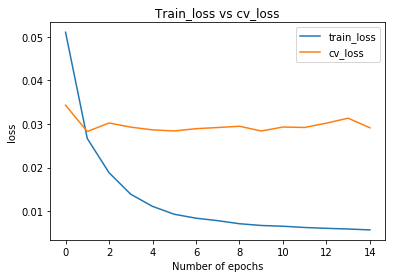

In [36]:
##### plot between train_loss and cv_loss

plt.plot(train_loss, label='train_loss')
plt.plot(cv_loss, label='cv_loss')
plt.title("Train_loss vs cv_loss")
plt.xlabel("Number of epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

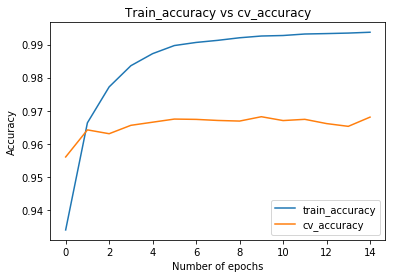

In [37]:
##### plot between train_accuracy and cv_accuracy

plt.plot(train_accuracy, label='train_accuracy')
plt.plot(cv_accuracy, label='cv_accuracy')
plt.title("Train_accuracy vs cv_accuracy")
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()